In [73]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sn
import seaborn.objects as so

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import preprocessing

import numpy as np
import pandas as pd


In [74]:
# confusion matrices before and after quantization
conf_matrix_before_q = np.array(
        [[272, 3, 3, 2, 0, 0, 2, 18],
        [1, 254, 23, 0, 0, 0, 0, 22],
        [3, 25, 260, 1, 0, 2, 0, 9],
        [1, 1, 0, 818, 73, 12, 6, 31],
        [3, 0, 1, 41, 832, 13, 14, 65],
        [4, 1, 20, 5, 9, 779, 13, 72],
        [0, 0, 0, 4, 22, 28, 893, 31],
        [17, 16, 9, 38, 33, 79, 29, 718]])

conf_matrix_after_q = np.array(
        [[274, 3, 2, 2, 0, 0, 2, 17],
         [1, 253, 25, 0, 0, 1, 0, 20],
         [3, 24, 261, 1, 0, 2, 0, 9],
         [1, 1, 1, 809, 72, 14, 7, 37],
         [4, 0, 1, 39, 818, 15, 21, 71],
         [5, 0, 18, 4, 6, 790, 15, 65],
         [0, 0, 0, 2, 21, 29, 894, 32],
         [13, 15, 9, 33, 29, 91, 34, 715]])

In [75]:
total_values = np.sum(conf_matrix_before_q, axis=1)

In [76]:
# compute metrics before quant.
precision_before = np.diag(conf_matrix_before_q) / np.sum(conf_matrix_before_q, axis=0)
recall_before = np.diag(conf_matrix_before_q) / np.sum(conf_matrix_before_q, axis=1)
f1_score_before = 2 * (precision_before * recall_before) / (precision_before + recall_before)

avg_precision_before = np.average(precision_before, weights=total_values)
avg_recall_before = np.average(recall_before, weights=total_values)
avg_f1_score_before = np.average(f1_score_before, weights=total_values)

print(f"avg precision before: {100*avg_precision_before:.2f}%,\navg recall before: {100*avg_recall_before:.2f}%,\navg f1 score before: {100*avg_f1_score_before:.2f}%")

avg precision before: 85.82%,
avg recall before: 85.70%,
avg f1 score before: 85.75%


In [77]:
# compute metrics after quant.
precision_after = np.diag(conf_matrix_after_q) / np.sum(conf_matrix_after_q, axis=0)
recall_after = np.diag(conf_matrix_after_q) / np.sum(conf_matrix_after_q, axis=1)
f1_score_after = 2 * (precision_after * recall_after) / (precision_after + recall_after)

avg_precision_after = np.average(precision_after, weights=total_values)
avg_recall_after = np.average(recall_after, weights=total_values)
avg_f1_score_after = np.average(f1_score_after, weights=total_values)

print(f"avg precision after: {100*avg_precision_after:.2f}%,\navg recall after: {100*avg_recall_after:.2f}%,\navg f1 score after: {100*avg_f1_score_after:.2f}%")

avg precision after: 85.63%,
avg recall after: 85.49%,
avg f1 score after: 85.53%


In [78]:
# normalize matrices
conf_matrix_before_q = preprocessing.normalize(conf_matrix_before_q, axis=1, norm='l1')
conf_matrix_after_q = preprocessing.normalize(conf_matrix_after_q, axis=1, norm='l1')

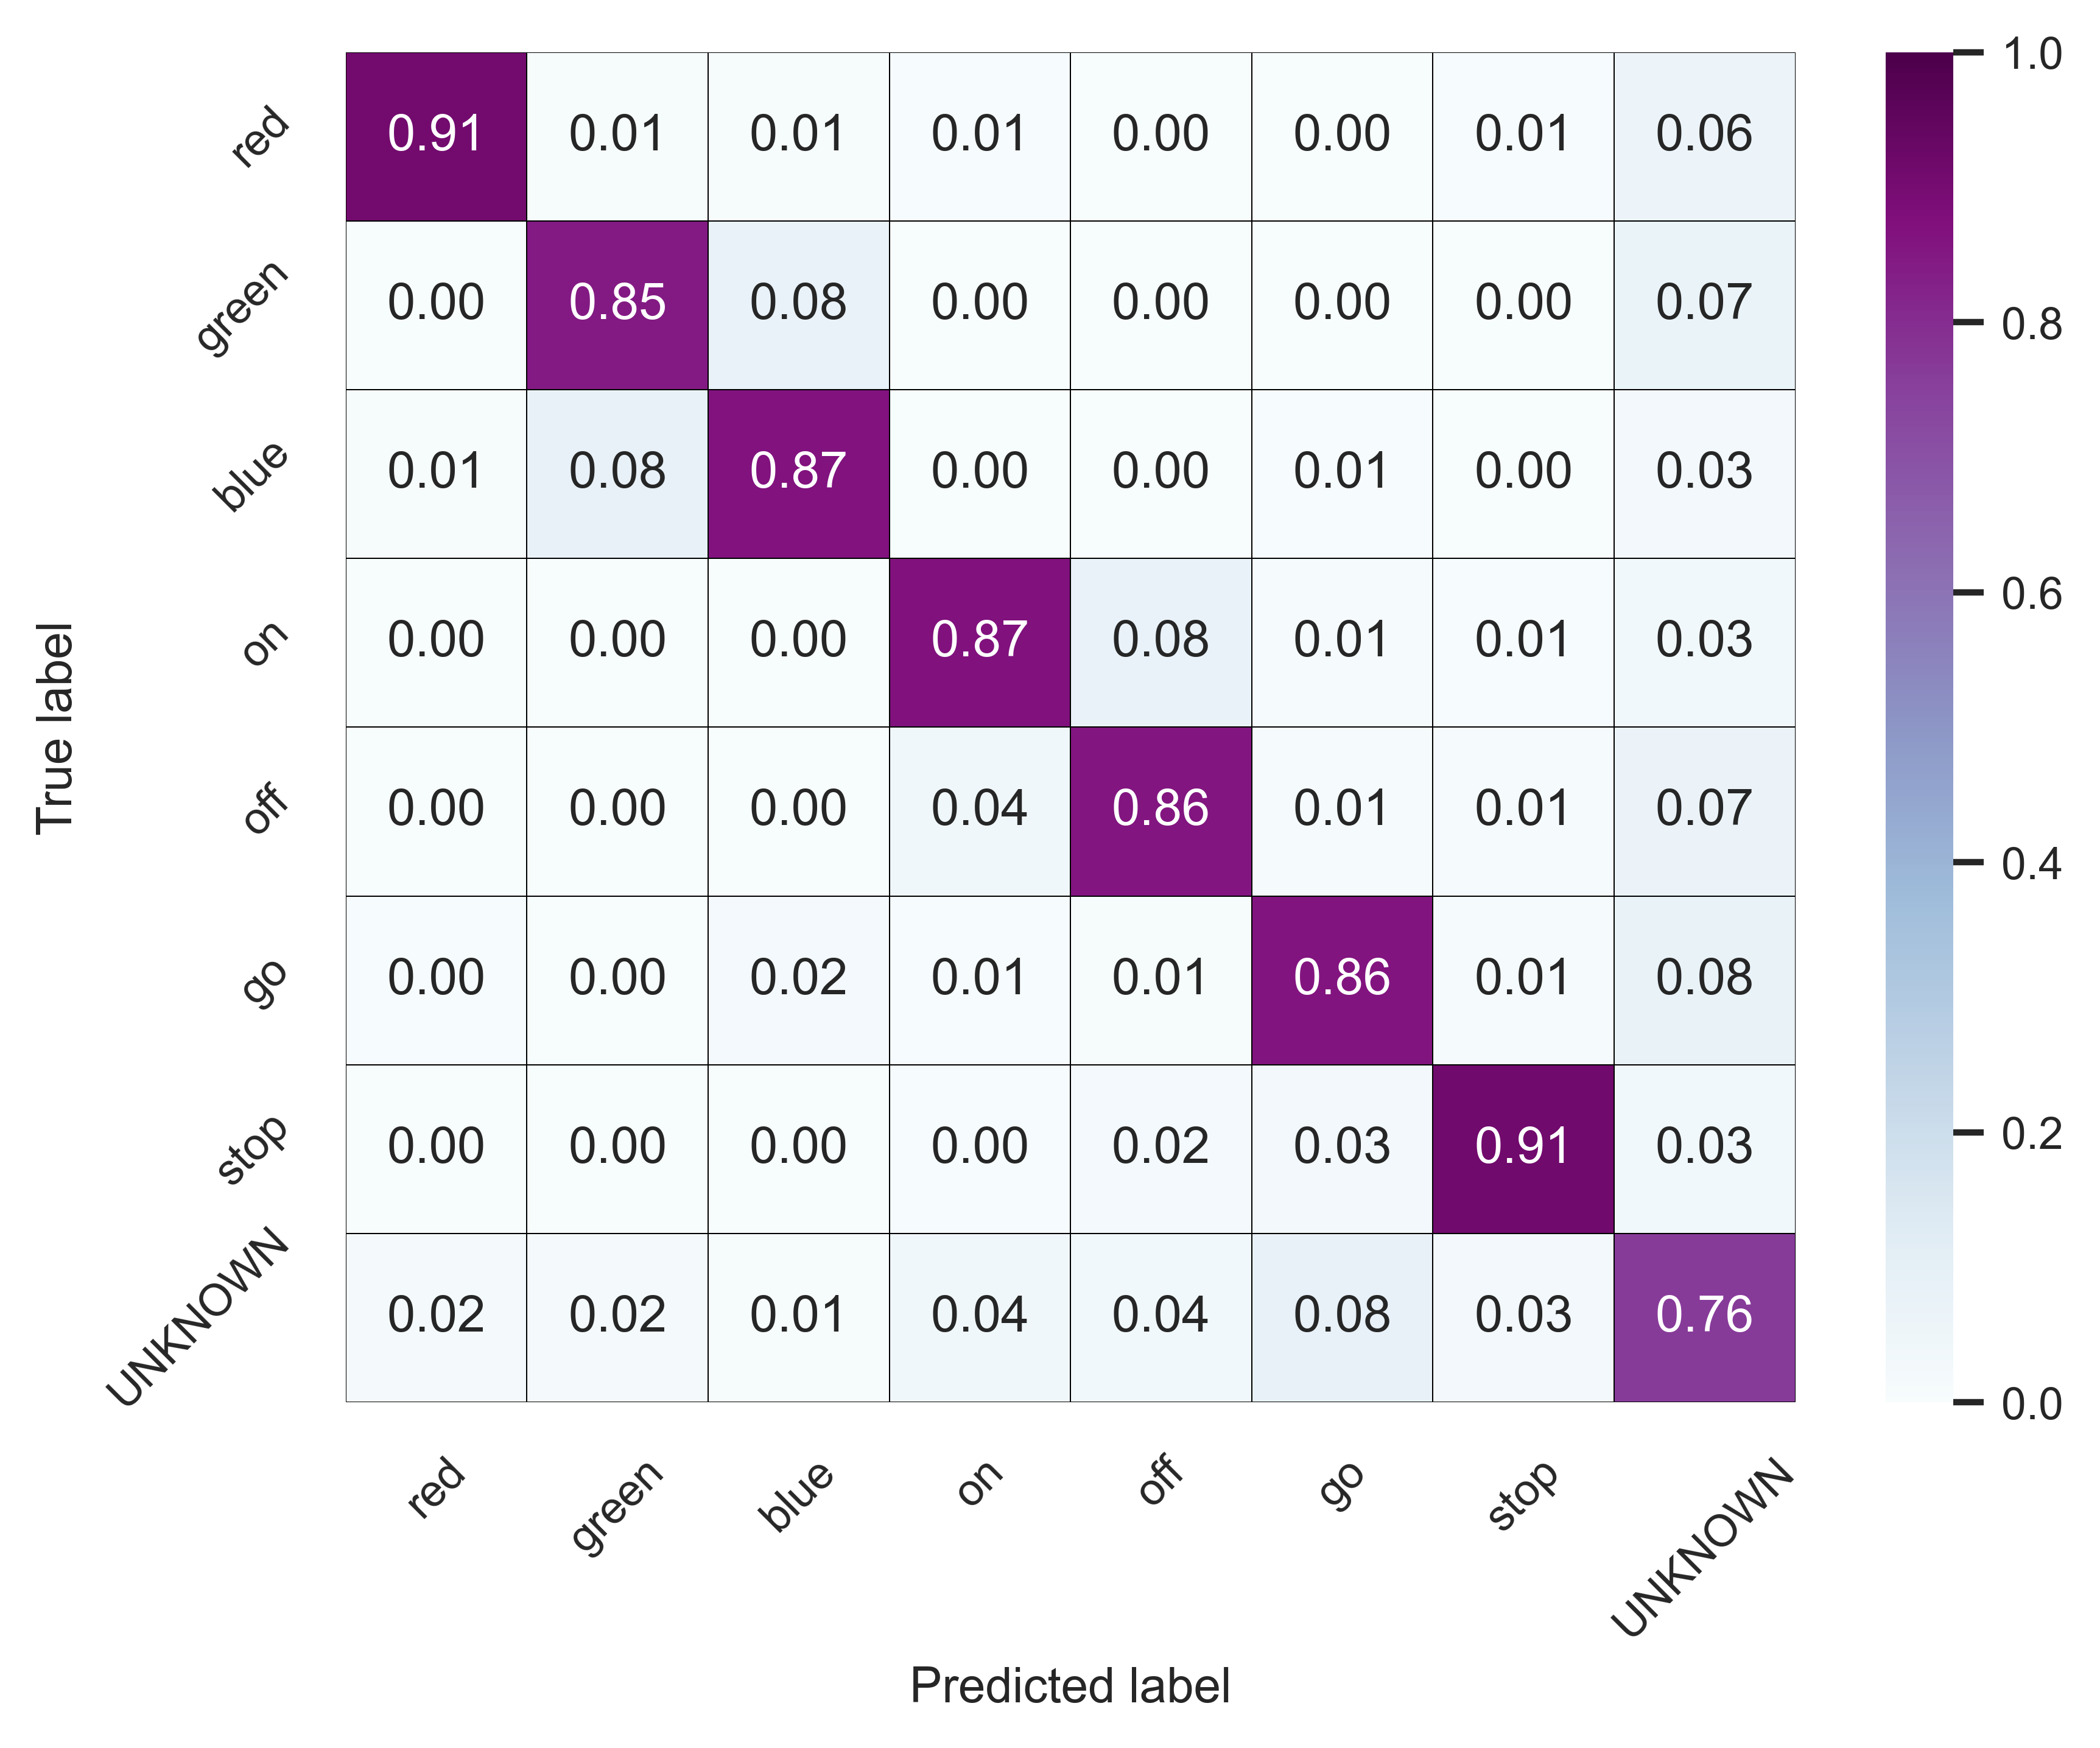

In [79]:
# plot matrix before quant.
df_cm = pd.DataFrame(conf_matrix_before_q, ['red', 'green', 'blue', 'on', 'off', 'go', 'stop', 'UNKNOWN'], ['red', 'green', 'blue', 'on', 'off', 'go', 'stop', 'UNKNOWN'])
sn.set(font_scale=0.8)
sn.heatmap(df_cm, cmap='BuPu', annot=True, vmax=1, annot_kws={"size": 10}, fmt='.2f', linewidths=0.01, linecolor='black')

plt.rcParams['figure.dpi'] = 600
plt.xticks(rotation=45)
plt.xlabel("Predicted label")
plt.yticks(rotation=45)
plt.ylabel("True label")
plt.show()

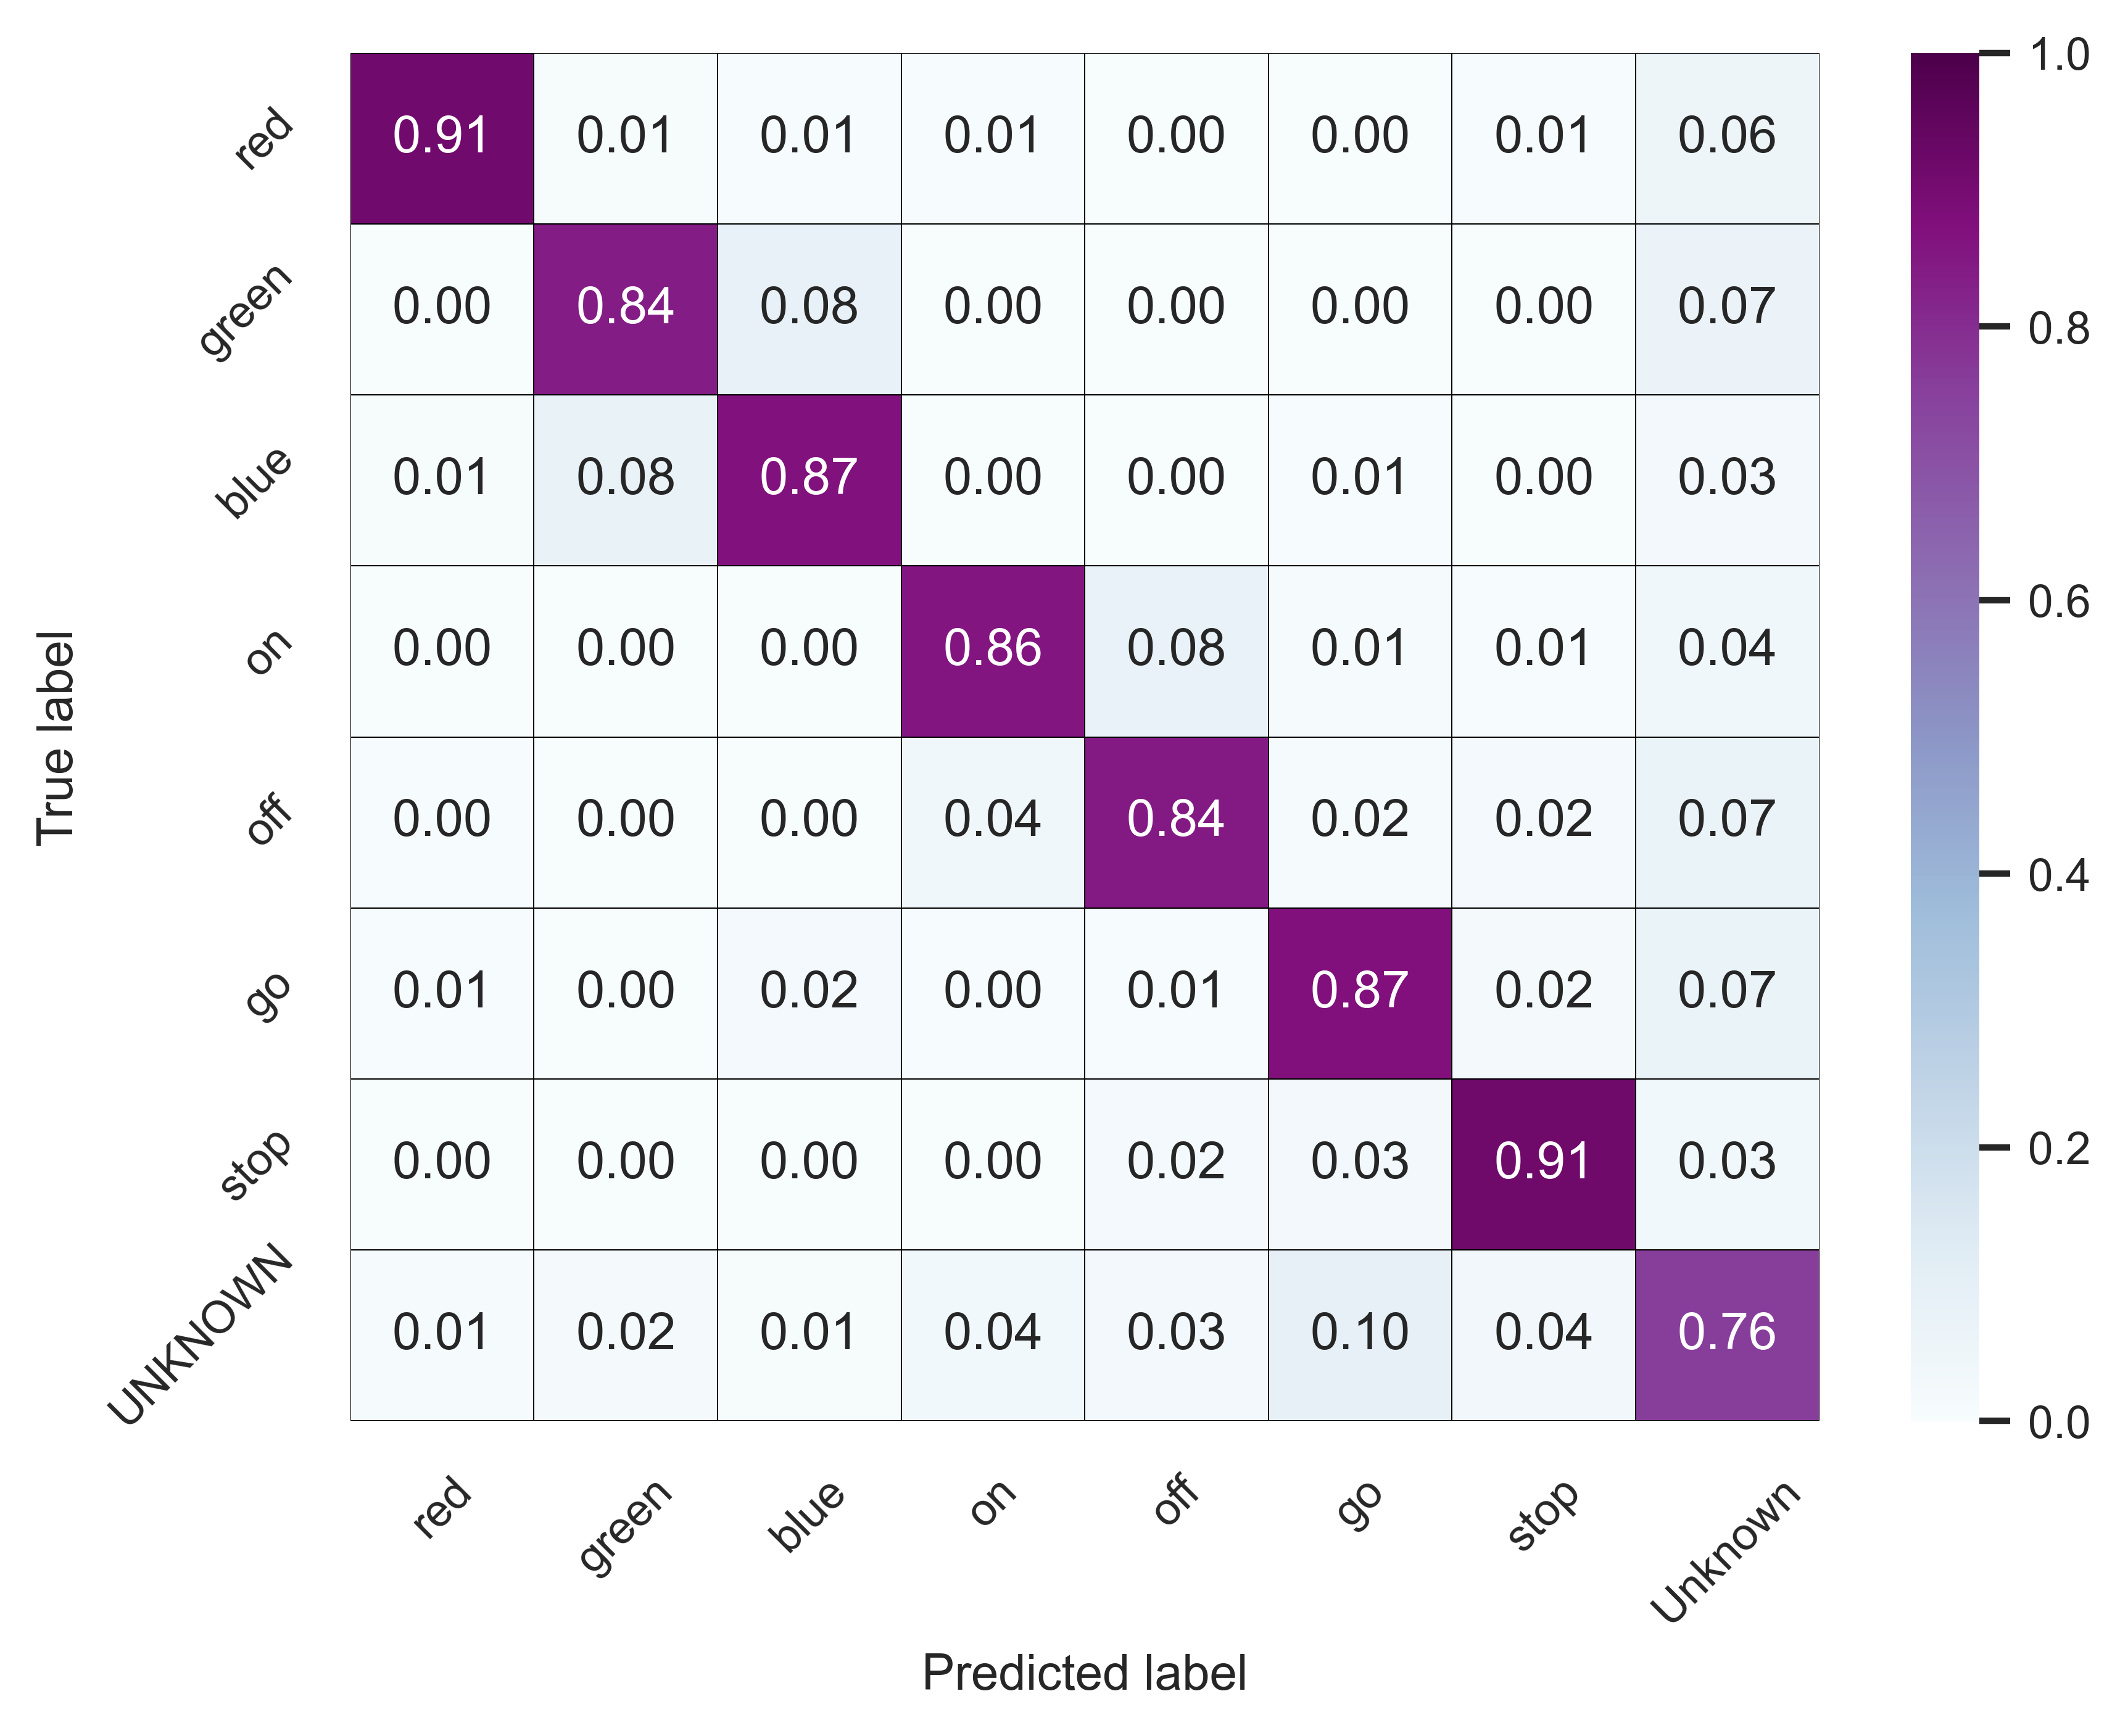

In [80]:
# plot matrix after quant.
df_cm = pd.DataFrame(conf_matrix_after_q, ['red', 'green', 'blue', 'on', 'off', 'go', 'stop', 'UNKNOWN'], ['red', 'green', 'blue', 'on', 'off', 'go', 'stop', 'Unknown'])

sn.set(font_scale=0.8)
sn.heatmap(df_cm, cmap='BuPu', annot=True, vmax=1, annot_kws={"size": 10}, fmt='.2f', linewidths=0.01, linecolor='black')

plt.rcParams['figure.dpi'] = 600
plt.xticks(rotation=45)
plt.xlabel("Predicted label")
plt.yticks(rotation=45)
plt.ylabel("True label")
plt.show()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_3280\4057009790.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.violinplot(data=data, x="Age", y="Gender", inner=None, palette='BuPu')


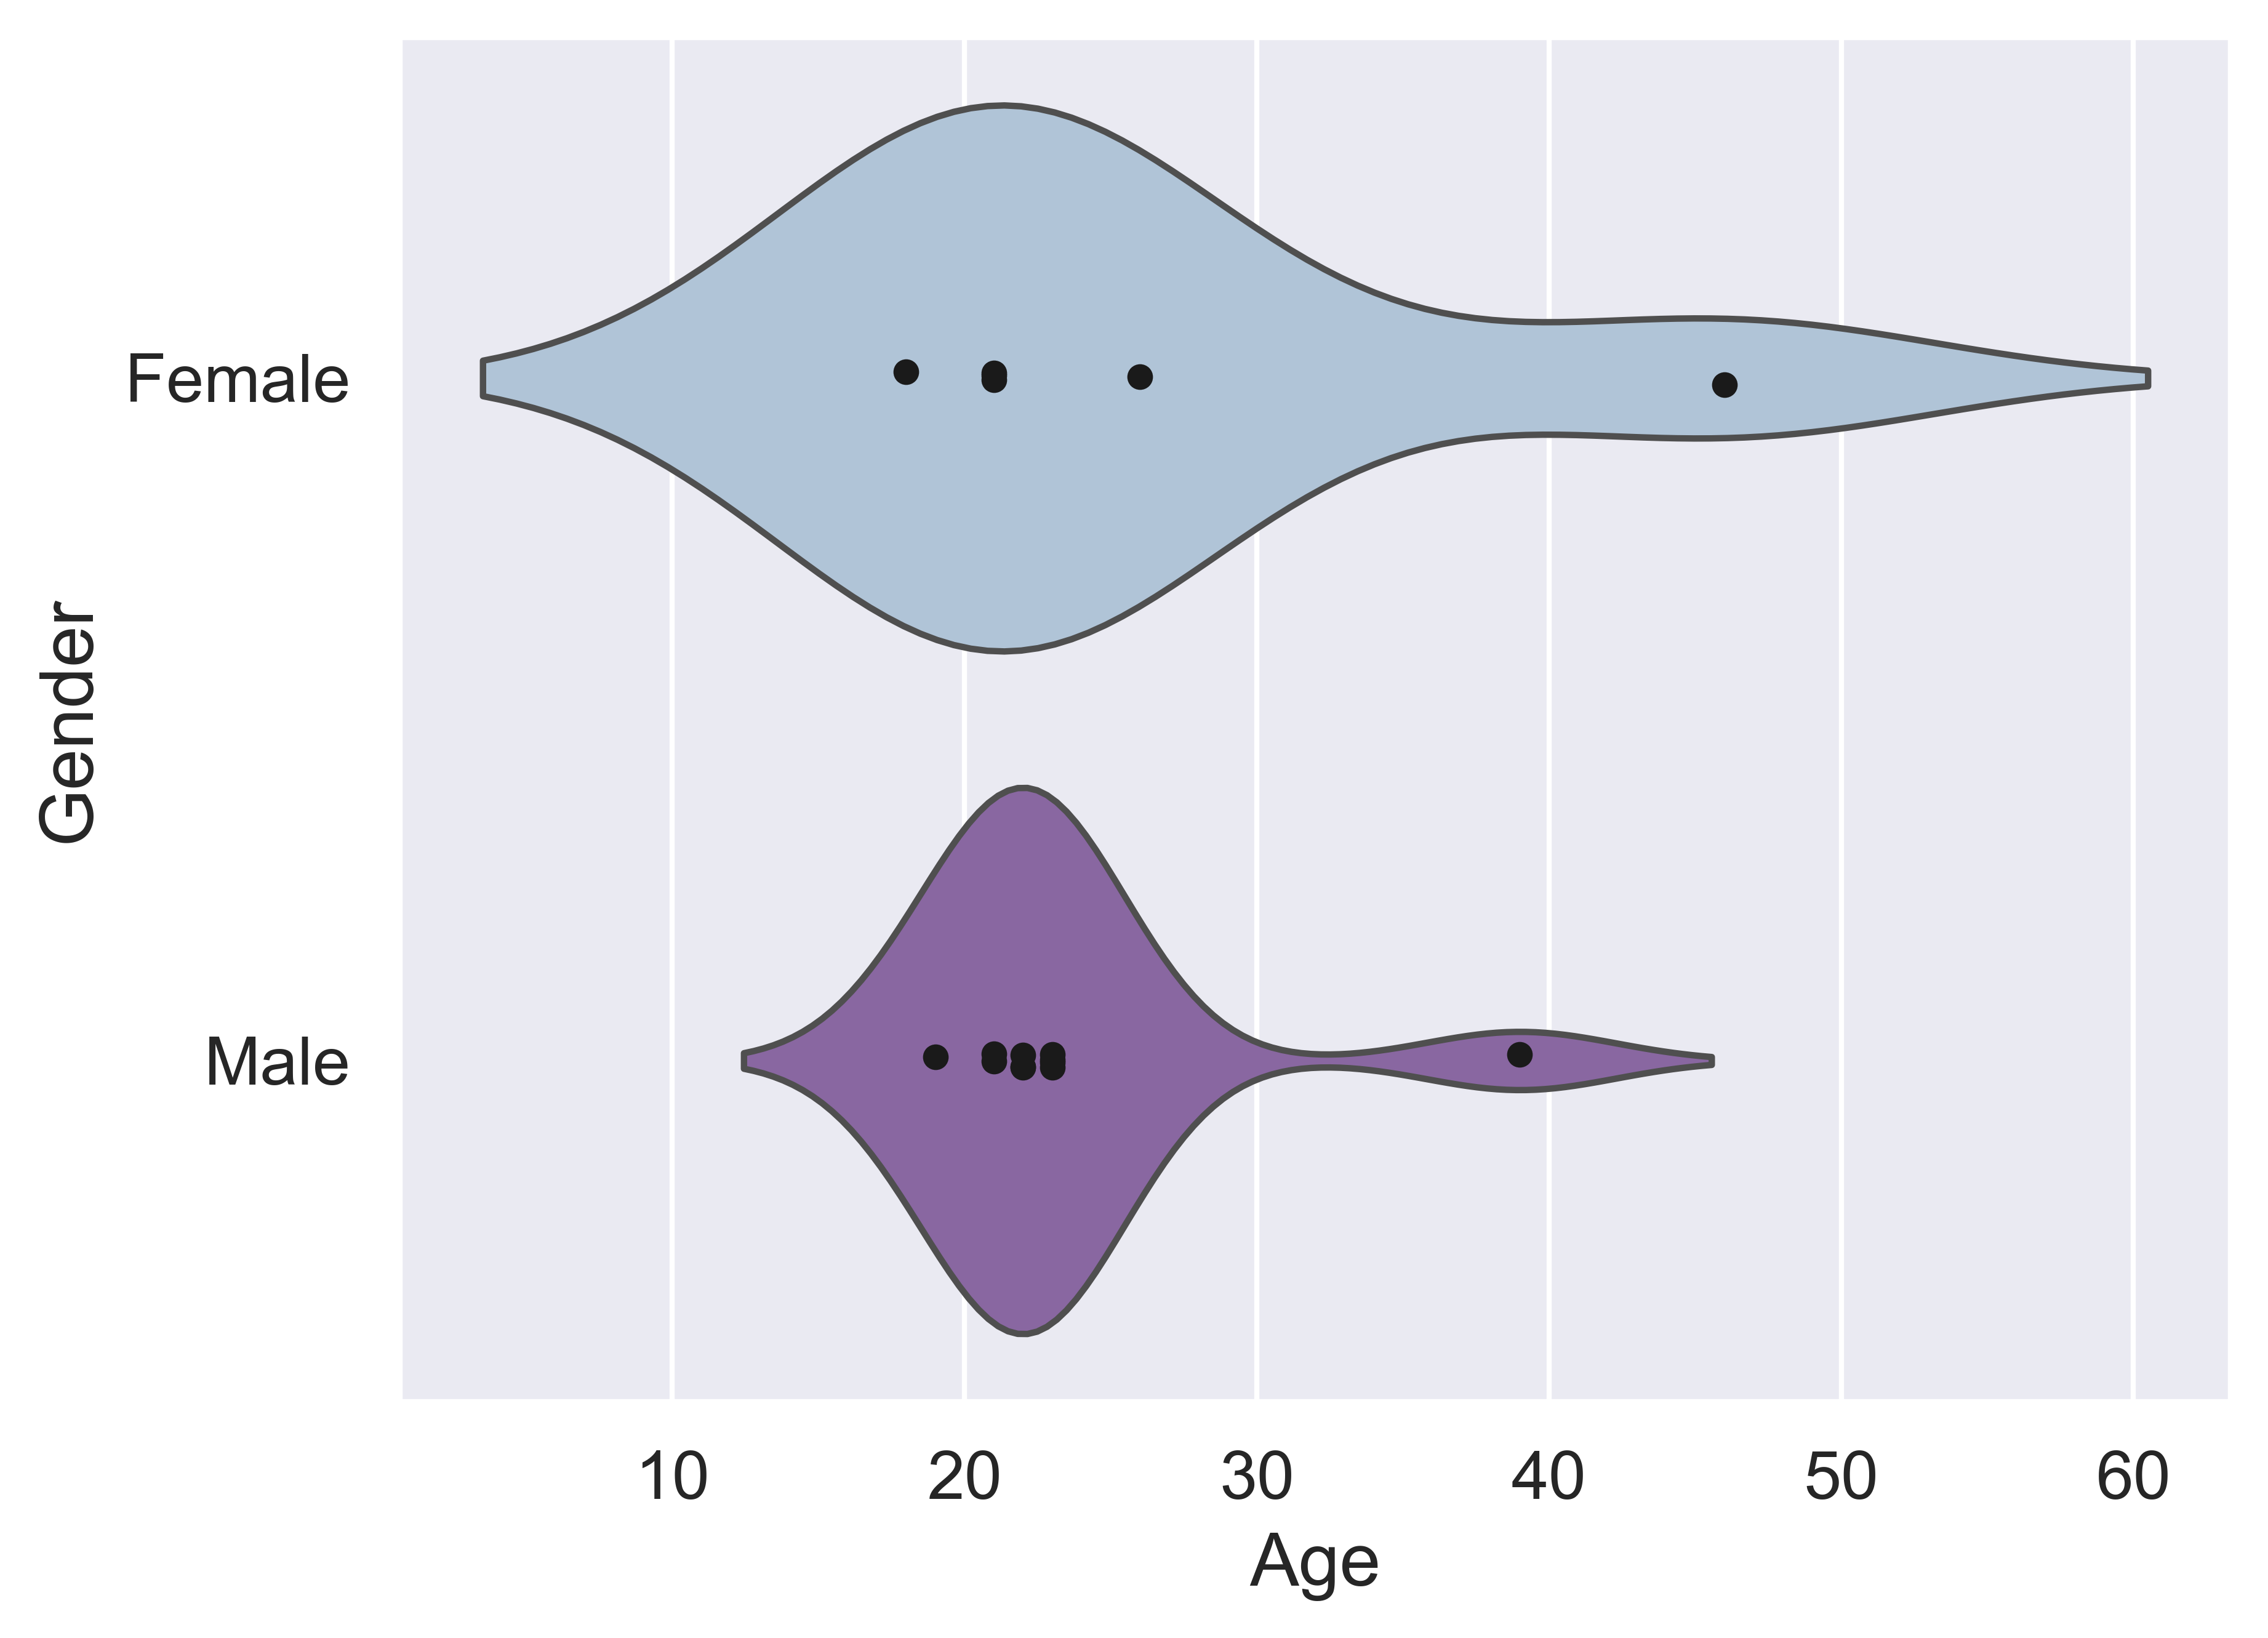

In [81]:
# dataset metrics
data = {
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male'],
    'Age': [26, 23, 22, 21, 22, 22, 46, 23, 21, 23, 21, 23, 39, 21, 18, 19, 21]
}
sn.set(font_scale=1.2)


sn.violinplot(data=data, x="Age", y="Gender", inner=None, palette='BuPu')
sn.stripplot(data=data, x="Age", y="Gender", jitter=0.01, color='k')

plt.rcParams['figure.dpi'] = 600
plt.show()